In [1]:
from keras.datasets import boston_housing
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()
train_data[1]




Using TensorFlow backend.


array([2.1770e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01,
       7.6100e+00, 1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02,
       1.4700e+01, 3.9538e+02, 3.1100e+00])

In [2]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

array([-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
        1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
       -1.71818909,  0.43190599, -1.32920239])

In [43]:
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [69]:
k=4
num_val_samples=len(train_data)//k
num_epochs=500
all_mae_histories=[]

for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [70]:
model= build_model()

In [71]:
history=model.fit(partial_train_data,partial_train_targets,validation_data=(val_data,val_targets),epochs=num_epochs,batch_size=1,)

mae_history=history.history['val_mean_absolute_error']
all_mae_histories.append(mae_history)




Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 1s 3ms/step - loss: 192.6682 - mean_absolute_error: 10.4214 - val_loss: 57.8231 - val_mean_absolute_error: 5.1733
Epoch 2/500
303/303 [==============================] - 1s 2ms/step - loss: 27.9324 - mean_absolute_error: 3.5093 - val_loss: 38.2738 - val_mean_absolute_error: 3.9860
Epoch 3/500
303/303 [==============================] - 1s 2ms/step - loss: 20.5675 - mean_absolute_error: 3.0060 - val_loss: 32.9826 - val_mean_absolute_error: 3.6977
Epoch 4/500
303/303 [==============================] - 1s 2ms/step - loss: 16.5825 - mean_absolute_error: 2.7071 - val_loss: 28.9554 - val_mean_absolute_error: 3.1956
Epoch 5/500
303/303 [==============================] - 1s 2ms/step - loss: 14.8170 - mean_absolute_error: 2.5313 - val_loss: 26.7809 - val_mean_absolute_error: 3.0365
Epoch 6/500
303/303 [==============================] - 1s 2ms/step - loss: 13.4328 - mean_absolute_error: 2.3953 - va

Epoch 50/500
303/303 [==============================] - 1s 2ms/step - loss: 6.1029 - mean_absolute_error: 1.5827 - val_loss: 13.3663 - val_mean_absolute_error: 2.6253
Epoch 51/500
303/303 [==============================] - 1s 2ms/step - loss: 5.6775 - mean_absolute_error: 1.5886 - val_loss: 12.2936 - val_mean_absolute_error: 2.4079
Epoch 52/500
303/303 [==============================] - 1s 2ms/step - loss: 5.2467 - mean_absolute_error: 1.5454 - val_loss: 12.0196 - val_mean_absolute_error: 2.3324
Epoch 53/500
303/303 [==============================] - 1s 2ms/step - loss: 5.7088 - mean_absolute_error: 1.5381 - val_loss: 12.7785 - val_mean_absolute_error: 2.4895
Epoch 54/500
303/303 [==============================] - 1s 2ms/step - loss: 5.9480 - mean_absolute_error: 1.5622 - val_loss: 12.6252 - val_mean_absolute_error: 2.4404
Epoch 55/500
303/303 [==============================] - 1s 2ms/step - loss: 5.3732 - mean_absolute_error: 1.5340 - val_loss: 13.1043 - val_mean_absolute_error: 2.540

303/303 [==============================] - 1s 2ms/step - loss: 3.9800 - mean_absolute_error: 1.2560 - val_loss: 14.4291 - val_mean_absolute_error: 2.6231
Epoch 100/500
303/303 [==============================] - 1s 2ms/step - loss: 4.1760 - mean_absolute_error: 1.2912 - val_loss: 12.2815 - val_mean_absolute_error: 2.3837
Epoch 101/500
303/303 [==============================] - 1s 2ms/step - loss: 3.8372 - mean_absolute_error: 1.2747 - val_loss: 14.2168 - val_mean_absolute_error: 2.6027
Epoch 102/500
303/303 [==============================] - 1s 2ms/step - loss: 3.6381 - mean_absolute_error: 1.2104 - val_loss: 15.6543 - val_mean_absolute_error: 2.7344
Epoch 103/500
303/303 [==============================] - 1s 2ms/step - loss: 4.3351 - mean_absolute_error: 1.3612 - val_loss: 14.6692 - val_mean_absolute_error: 2.7535
Epoch 104/500
303/303 [==============================] - 1s 2ms/step - loss: 4.0059 - mean_absolute_error: 1.3167 - val_loss: 14.0316 - val_mean_absolute_error: 2.6106
Epoch 

Epoch 148/500
303/303 [==============================] - 1s 2ms/step - loss: 3.1568 - mean_absolute_error: 1.1165 - val_loss: 13.9745 - val_mean_absolute_error: 2.4929
Epoch 149/500
303/303 [==============================] - 1s 2ms/step - loss: 2.7672 - mean_absolute_error: 1.0917 - val_loss: 13.2296 - val_mean_absolute_error: 2.3915
Epoch 150/500
303/303 [==============================] - 1s 2ms/step - loss: 3.0687 - mean_absolute_error: 1.1662 - val_loss: 13.9595 - val_mean_absolute_error: 2.5742
Epoch 151/500
303/303 [==============================] - 1s 2ms/step - loss: 2.8246 - mean_absolute_error: 1.0974 - val_loss: 13.8294 - val_mean_absolute_error: 2.4456
Epoch 152/500
303/303 [==============================] - 1s 2ms/step - loss: 3.4119 - mean_absolute_error: 1.1536 - val_loss: 14.7408 - val_mean_absolute_error: 2.7011
Epoch 153/500
303/303 [==============================] - 1s 2ms/step - loss: 3.0575 - mean_absolute_error: 1.1137 - val_loss: 14.8208 - val_mean_absolute_error:

Epoch 197/500
303/303 [==============================] - 1s 2ms/step - loss: 2.4371 - mean_absolute_error: 1.0102 - val_loss: 16.0407 - val_mean_absolute_error: 2.7402
Epoch 198/500
303/303 [==============================] - 1s 2ms/step - loss: 2.3600 - mean_absolute_error: 0.9579 - val_loss: 16.7986 - val_mean_absolute_error: 2.9393
Epoch 199/500
303/303 [==============================] - 1s 2ms/step - loss: 2.3227 - mean_absolute_error: 0.9694 - val_loss: 14.4693 - val_mean_absolute_error: 2.5277
Epoch 200/500
303/303 [==============================] - 1s 2ms/step - loss: 2.4521 - mean_absolute_error: 1.0218 - val_loss: 15.6314 - val_mean_absolute_error: 2.6596
Epoch 201/500
303/303 [==============================] - 1s 2ms/step - loss: 2.3174 - mean_absolute_error: 1.0386 - val_loss: 14.5527 - val_mean_absolute_error: 2.5940
Epoch 202/500
303/303 [==============================] - 1s 2ms/step - loss: 2.4319 - mean_absolute_error: 0.9828 - val_loss: 18.7750 - val_mean_absolute_error:

Epoch 246/500
303/303 [==============================] - 1s 2ms/step - loss: 1.7429 - mean_absolute_error: 0.8793 - val_loss: 15.2346 - val_mean_absolute_error: 2.5612
Epoch 247/500
303/303 [==============================] - 1s 2ms/step - loss: 1.9262 - mean_absolute_error: 0.9276 - val_loss: 15.8965 - val_mean_absolute_error: 2.6860
Epoch 248/500
303/303 [==============================] - 1s 2ms/step - loss: 1.7451 - mean_absolute_error: 0.9339 - val_loss: 16.4197 - val_mean_absolute_error: 2.6729
Epoch 249/500
303/303 [==============================] - 1s 2ms/step - loss: 1.7942 - mean_absolute_error: 0.9284 - val_loss: 15.3059 - val_mean_absolute_error: 2.6563
Epoch 250/500
303/303 [==============================] - 1s 2ms/step - loss: 1.7110 - mean_absolute_error: 0.8831 - val_loss: 16.2709 - val_mean_absolute_error: 2.7196
Epoch 251/500
303/303 [==============================] - 1s 2ms/step - loss: 1.8546 - mean_absolute_error: 0.9228 - val_loss: 16.7281 - val_mean_absolute_error:

Epoch 295/500
303/303 [==============================] - 1s 2ms/step - loss: 1.7891 - mean_absolute_error: 0.8954 - val_loss: 17.0912 - val_mean_absolute_error: 2.8487
Epoch 296/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4793 - mean_absolute_error: 0.8365 - val_loss: 17.4288 - val_mean_absolute_error: 2.8469
Epoch 297/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5698 - mean_absolute_error: 0.8656 - val_loss: 15.8924 - val_mean_absolute_error: 2.6627
Epoch 298/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5899 - mean_absolute_error: 0.8840 - val_loss: 16.4527 - val_mean_absolute_error: 2.7092
Epoch 299/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3135 - mean_absolute_error: 0.8159 - val_loss: 18.0289 - val_mean_absolute_error: 2.8803
Epoch 300/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5310 - mean_absolute_error: 0.8715 - val_loss: 18.9457 - val_mean_absolute_error:

Epoch 344/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2998 - mean_absolute_error: 0.8338 - val_loss: 16.1575 - val_mean_absolute_error: 2.7985
Epoch 345/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3058 - mean_absolute_error: 0.8130 - val_loss: 15.4283 - val_mean_absolute_error: 2.6788
Epoch 346/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2122 - mean_absolute_error: 0.7909 - val_loss: 16.5393 - val_mean_absolute_error: 2.8425
Epoch 347/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3216 - mean_absolute_error: 0.8178 - val_loss: 17.9093 - val_mean_absolute_error: 2.9916
Epoch 348/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4302 - mean_absolute_error: 0.8369 - val_loss: 15.4925 - val_mean_absolute_error: 2.6139
Epoch 349/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2685 - mean_absolute_error: 0.7665 - val_loss: 16.3307 - val_mean_absolute_error:

Epoch 393/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2527 - mean_absolute_error: 0.7636 - val_loss: 17.3740 - val_mean_absolute_error: 2.9156
Epoch 394/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0498 - mean_absolute_error: 0.7530 - val_loss: 16.0636 - val_mean_absolute_error: 2.7133
Epoch 395/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1874 - mean_absolute_error: 0.7638 - val_loss: 16.1960 - val_mean_absolute_error: 2.6946
Epoch 396/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9846 - mean_absolute_error: 0.7229 - val_loss: 16.2633 - val_mean_absolute_error: 2.8335
Epoch 397/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2312 - mean_absolute_error: 0.7946 - val_loss: 17.8727 - val_mean_absolute_error: 2.9377
Epoch 398/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2640 - mean_absolute_error: 0.7706 - val_loss: 17.7413 - val_mean_absolute_error:

Epoch 442/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9785 - mean_absolute_error: 0.6868 - val_loss: 15.6418 - val_mean_absolute_error: 2.8387
Epoch 443/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9984 - mean_absolute_error: 0.7228 - val_loss: 16.3881 - val_mean_absolute_error: 2.9008
Epoch 444/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9950 - mean_absolute_error: 0.7079 - val_loss: 15.4879 - val_mean_absolute_error: 2.7552
Epoch 445/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8945 - mean_absolute_error: 0.6789 - val_loss: 14.3610 - val_mean_absolute_error: 2.7353
Epoch 446/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9055 - mean_absolute_error: 0.6929 - val_loss: 16.3334 - val_mean_absolute_error: 2.8827
Epoch 447/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9968 - mean_absolute_error: 0.7088 - val_loss: 16.5345 - val_mean_absolute_error:

Epoch 491/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9677 - mean_absolute_error: 0.6664 - val_loss: 17.0155 - val_mean_absolute_error: 2.8432
Epoch 492/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7662 - mean_absolute_error: 0.6542 - val_loss: 17.2654 - val_mean_absolute_error: 2.9240
Epoch 493/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8943 - mean_absolute_error: 0.6787 - val_loss: 17.3228 - val_mean_absolute_error: 2.9231
Epoch 494/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7940 - mean_absolute_error: 0.6521 - val_loss: 16.2537 - val_mean_absolute_error: 2.7845
Epoch 495/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8055 - mean_absolute_error: 0.6590 - val_loss: 16.6911 - val_mean_absolute_error: 2.9195
Epoch 496/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8609 - mean_absolute_error: 0.6628 - val_loss: 16.8512 - val_mean_absolute_error:

In [72]:
all_mae_histories

[[5.173301347411505,
  3.9859517824531783,
  3.6976770079962096,
  3.19561493750846,
  3.036464275700031,
  2.8840020009786778,
  2.856945812112034,
  2.8619189073543736,
  2.6928461188136943,
  2.7638461235726233,
  2.7257644351166075,
  2.612215825826815,
  2.6325129707260886,
  2.5700076877480686,
  2.5007961575347597,
  2.501716420201972,
  2.468467348873025,
  2.5875322889573504,
  2.930172382014813,
  2.3999778823097153,
  2.6232666261125317,
  2.8363102355805956,
  2.4131690535214867,
  2.353727114082563,
  2.3859617733719327,
  2.653652540527948,
  2.3539594045960075,
  2.541243562603941,
  2.476916530344746,
  2.4035407292960893,
  2.551271145886714,
  2.477143117696932,
  2.5320992705845597,
  2.4969550501001945,
  2.453722849930867,
  2.391247985386612,
  2.73847501112683,
  2.388070824122665,
  2.395731283886598,
  2.3733269625371047,
  2.361690077451196,
  2.3668087496615873,
  2.473831006796053,
  2.3076069236981986,
  2.396097730882097,
  2.7566709565644216,
  2.77851097

In [73]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories])for i in range (num_epochs)]
average_mae_history

[5.173301347411505,
 3.9859517824531783,
 3.6976770079962096,
 3.19561493750846,
 3.036464275700031,
 2.8840020009786778,
 2.856945812112034,
 2.8619189073543736,
 2.6928461188136943,
 2.7638461235726233,
 2.7257644351166075,
 2.612215825826815,
 2.6325129707260886,
 2.5700076877480686,
 2.5007961575347597,
 2.501716420201972,
 2.468467348873025,
 2.5875322889573504,
 2.930172382014813,
 2.3999778823097153,
 2.6232666261125317,
 2.8363102355805956,
 2.4131690535214867,
 2.353727114082563,
 2.3859617733719327,
 2.653652540527948,
 2.3539594045960075,
 2.541243562603941,
 2.476916530344746,
 2.4035407292960893,
 2.551271145886714,
 2.477143117696932,
 2.5320992705845597,
 2.4969550501001945,
 2.453722849930867,
 2.391247985386612,
 2.73847501112683,
 2.388070824122665,
 2.395731283886598,
 2.3733269625371047,
 2.361690077451196,
 2.3668087496615873,
 2.473831006796053,
 2.3076069236981986,
 2.396097730882097,
 2.7566709565644216,
 2.7785109718247214,
 2.3270790458905815,
 2.4480480156322

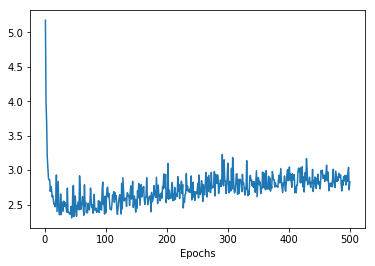

In [74]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.show()

In [83]:
def smooth_curve(points,factor=0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous=smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
            
smooth_mae_history=smooth_curve(average_mae_history[10:])
smooth_mae_history


[2.7257644351166075,
 2.7144095741876284,
 2.7062199138414744,
 2.692598691232134,
 2.673418437862397,
 2.6562482360963546,
 2.637470147374022,
 2.6324763615323548,
 2.6622459635806006,
 2.636019155453512,
 2.634743902519414,
 2.654900535825532,
 2.6307273875951274,
 2.6030273602438707,
 2.581320801556677,
 2.588553975453804,
 2.5650945183680247,
 2.5627094227916163,
 2.5541301335469293,
 2.5390711931218455,
 2.5402911883983323,
 2.533976381328192,
 2.533788670253829,
 2.5301053082384657,
 2.522467062407706,
 2.5093451547055965,
 2.53225814034772,
 2.517839408725214,
 2.5056285962413525,
 2.4923984328709277,
 2.4793275973289544,
 2.468075712562218,
 2.4686512419856013,
 2.452546810156861,
 2.4469019022293845,
 2.477878807662888,
 2.5079420240790715,
 2.489855726260222,
 2.485674955197425,
 2.4996383200120222,
 2.490465829112589,
 2.474661978900885,
 2.4761478525122733,
 2.4725770699450824,
 2.479402386871672,
 2.4738956338388256,
 2.518251785549028,
 2.5394491680202167,
 2.528731019220

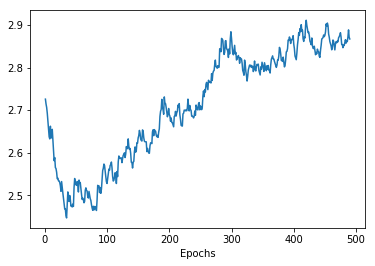

In [82]:
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.show()

In [85]:
model=build_model()
model.fit(train_data,train_targets,epochs=80,batch_size=16)
test_mse,test_mae=model.evaluate(test_data,test_targets)

Epoch 1/80
404/404 [==============================] - 0s 724us/step - loss: 502.8869 - mean_absolute_error: 20.5944
Epoch 2/80
404/404 [==============================] - 0s 143us/step - loss: 329.6825 - mean_absolute_error: 16.0337
Epoch 3/80
404/404 [==============================] - 0s 141us/step - loss: 169.7912 - mean_absolute_error: 10.5304
Epoch 4/80
404/404 [==============================] - 0s 148us/step - loss: 80.9809 - mean_absolute_error: 6.9058
Epoch 5/80
404/404 [==============================] - 0s 143us/step - loss: 48.4911 - mean_absolute_error: 5.3041
Epoch 6/80
404/404 [==============================] - 0s 140us/step - loss: 32.2419 - mean_absolute_error: 4.1954
Epoch 7/80
404/404 [==============================] - 0s 160us/step - loss: 25.6573 - mean_absolute_error: 3.6970
Epoch 8/80
404/404 [==============================] - 0s 141us/step - loss: 22.3321 - mean_absolute_error: 3.3934
Epoch 9/80
404/404 [==============================] - 0s 152us/step - loss: 20.185

In [86]:
test_mae

2.5445578238543343

In [87]:
test_mse

15.843151765711168

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 369341785089947249
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 14369826972702040945
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2559227643638136213
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 75759616
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1075980229459697684
physical_device_desc: "device: 0, name: GeForce GTX 1060 3GB, pci bus id: 0000:08:00.0, compute capability: 6.1"
]


In [2]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))